In [1]:
import numpy as np
from matplotlib import pyplot as plt

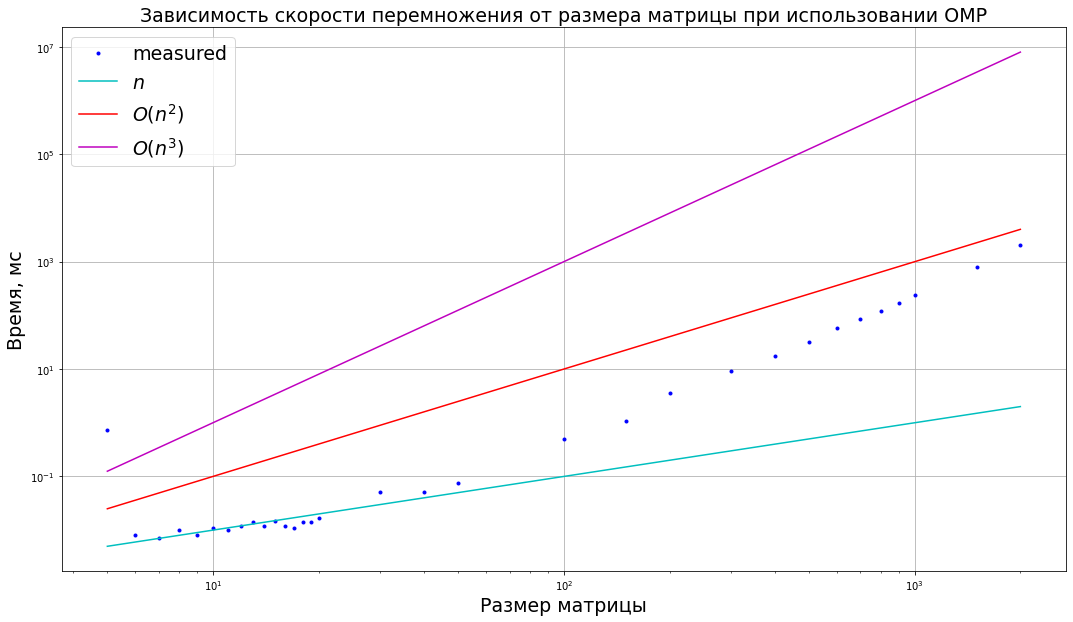

Оценочная асимптотика алгоритма n^2.0751366653530683


In [37]:
sizes, times = np.genfromtxt("res.csv", delimiter=",").transpose()

szs = np.arange(np.min(sizes), np.max(sizes), 1)

quadric = szs**2 * 1e-3
qubic = szs**3 * 1e-3
lin = szs * 1e-3
logs = np.log(szs)


def get_lstsq_coeffs(x, y):
    return np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y, rcond=None)[0]


def get_log_coeffs(x, y):
    return get_lstsq_coeffs(np.log10(x), np.log10(y))


a, b = get_log_coeffs(sizes, times)

plt.figure(figsize=(18, 10))
plt.loglog(sizes, times, "b.", label="measured")
plt.loglog(szs, lin, "c-", label="$n$")
plt.loglog(szs, quadric, "r-", label="$ O(n^2) $")
plt.loglog(szs, qubic, "m-", label="$ O(n^3) $")

plt.grid()
plt.xlabel("Размер матрицы", fontsize=19)
plt.ylabel("Время, мс", fontsize=19)
plt.title(
    "Зависимость скорости перемножения от размера матрицы при использовании OMP",
    fontsize=19,
)
plt.legend(fontsize=19)
plt.show()

print(f"Оценочная асимптотика алгоритма n^{a}")
